### Created by: Anthony D. Cho
### Last update: 19.05.2021

**Subject**: Keras (Multi-Layer Perceptron MLP) - Applied to Abalone data in classification problem (Multi-class)



## Libraries dependencies

In [168]:
from time import time
from pandas import read_csv
import matplotlib.pyplot as plt
from numpy import argmax, where
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## tensorflow-Keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

## Customized functions

In [169]:
def plot_history(history, width=12, height=6):
  """
  DESCRIPTION:
    History performance of the keras model
  
  INPUT:
    @param history: history of performance of fitted model
    @type history: tensorflow.python.keras.callbacks.History

    @param width: width of the graphic display
    @type width: int

    @param height: height of the graphic display
    @type height: int

  OUTPUT:
    A graphic
  """

  ## Metrics keys stored in tensorflow object
  keys = list(history.history.keys())

  ## Number of epoch used for fit the model
  epoch = range(1, len(history.epoch) +1)

  ## Check if validation set was used.
  withValidation = False
  for key in keys:
    if 'val' in key:
      withValidation = True

  ## Number of metrics 
  nMetrics = len(keys)
  if withValidation:
    nMetrics = nMetrics//2

  ## Plot-space instance
  plt.figure(figsize=(width, height))

  for i in range(nMetrics):
    plt.subplot(nMetrics, 1, i+1)

    ## Plot (train) metric value
    labelMetric = keys[i]
    metric = history.history[keys[i]]
    plt.plot(epoch, metric, 'o-', label=labelMetric)

    if withValidation:
      ## Plot (validation) metric value
      labelMetricVal = keys[i+nMetrics]
      metricVal = history.history[keys[i+nMetrics]]
      plt.plot(epoch, metricVal, 'o-', label=labelMetricVal)

    plt.xlim(epoch[0], epoch[-1])
    plt.legend()
    plt.grid()

  plt.xlabel('Epoch')
  plt.show()

# Problem: Abalone

**Target**: The number of rings is the value to predict

## Data loading and preprocessing

Source: [Abalone](https://archive.ics.uci.edu/ml/datasets/Abalone) (UCI Repository)

In [170]:
start = time()
print('Loading data ...')

## Column names of the dataset
colnames = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 
            'Viscera_weight', 'Shell_weight', 'Rings']

## Load data
data = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None)

## Dataset column names assignation
data.columns = colnames

## Display Raw data
print(data.head())

## Simple Binary encoding applied to Sex column converting 'F' -> 0 and 'M' -> 1
data['Sex'] = where(data['Sex'] == 'F', 0, 1)

## Predictors and targets
X = data.drop(columns=['Rings'])
y = data['Rings']

## Data partition
print('Creating partition...')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Data normalization
print('data normalizing...')
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## One-Hot Encoder transform to targets
print('Apply One-Hot Encoding...')
encoder = OneHotEncoder().fit(y.values.reshape(-1,1))
y_train_encode = encoder.transform(y_train.values.reshape(-1,1)).toarray()
y_test_encode = encoder.transform(y_test.values.reshape(-1,1)).toarray()

print('Time spent[s]: ', time()-start)

Loading data ...
  Sex  Length  Diameter  ...  Viscera_weight  Shell_weight  Rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]
Creating partition...
data normalizing...
Apply One-Hot Encoding...
Time spent[s]:  1.1110835075378418


In [104]:
data.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [57]:
## Display target counts
data['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

## Build model

In [174]:
## Model instance
model = Sequential(name='Classification')
model.add(layers.Dense(units=9, 
                       activation='relu', 
                       input_shape=(X_train.shape[1],), 
                       name='Hidden_01'))
model.add(layers.Dense(units=13, 
                       activation='relu', 
                       name='Hidden_02'))
model.add(layers.Dense(units=y_train_encode.shape[1],
                       activation='softmax', 
                       name='Output'))

## Set compiler configuration
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Display model
model.summary()

Model: "Classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_01 (Dense)            (None, 9)                 81        
_________________________________________________________________
Hidden_02 (Dense)            (None, 13)                130       
_________________________________________________________________
Output (Dense)               (None, 28)                392       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


In [175]:
## Fit model
start = time()
history = model.fit(x=X_train, y=y_train_encode, validation_split=0.15,
                    epochs=100, 
                    batch_size=32)
print('Time spent[s]: ', time()-start)

Epoch 1/100
84/84 [==============================] - 1s 6ms/step - loss: 3.2676 - accuracy: 0.0340 - val_loss: 3.0573 - val_accuracy: 0.1234
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 2.9305 - accuracy: 0.1294 - val_loss: 2.5981 - val_accuracy: 0.1681
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 2.5491 - accuracy: 0.1504 - val_loss: 2.5070 - val_accuracy: 0.1681
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 2.4705 - accuracy: 0.1547 - val_loss: 2.4645 - val_accuracy: 0.1851
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 2.4012 - accuracy: 0.1725 - val_loss: 2.4198 - val_accuracy: 0.1957
Epoch 6/100
84/84 [==============================] - 0s 3ms/step - loss: 2.3615 - accuracy: 0.2031 - val_loss: 2.3831 - val_accuracy: 0.2234
Epoch 7/100
84/84 [==============================] - 0s 3ms/step - loss: 2.3452 - accuracy: 0.2270 - val_loss: 2.3511 - val_accuracy: 0.2489
Epoch 8/100
8

## Model performances display

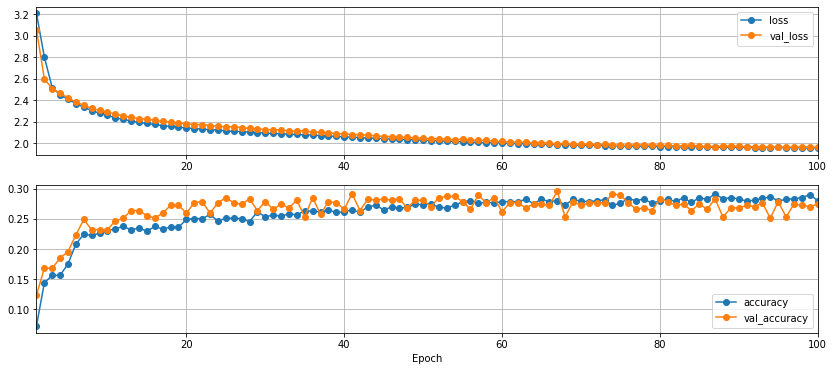

33/33 [==============================] - 0s 2ms/step - loss: 2.0133 - accuracy: 0.2632


[2.013340711593628, 0.2631579041481018]

In [176]:
## Display performances
plot_history(history, width=14)

## Compute prediction with test set
model.evaluate(X_test, y_test_encode)

## Predictions

In [177]:
## Make prediction using test set
prediction = model.predict(X_test)

In [178]:
## Decoding predictions to Class
prediction_class = argmax(prediction, axis=-1) + 1
prediction_class

array([13,  9, 10, ...,  9, 11, 10])

In [179]:
## Display confusion matrix
confusion_matrix(y_true=y_test, y_pred=prediction_class).tolist()

[[0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 3, 8, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 9, 12, 16, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 6, 27, 18, 7, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 4, 25, 34, 38, 11, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 7, 14, 65, 41, 8, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 2, 10, 26, 63, 42, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 5, 3, 17, 48, 44, 19, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 4, 11, 33, 43, 25, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 7, 19, 39, 21, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 5, 7, 20, 17, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 2, 5, 15, 5, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 3, 9, 7, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 2, 6, 4, 0, 2, 